In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: xlabel='SepalWidthCm'>

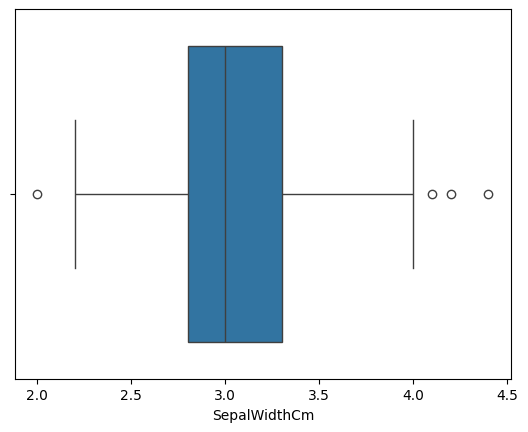

In [5]:
sns.boxplot(x = "SepalWidthCm", data = data) 
# using the same dataframe to specify for the x axis and to provide the data for plotting

<Axes: xlabel='PetalLengthCm'>

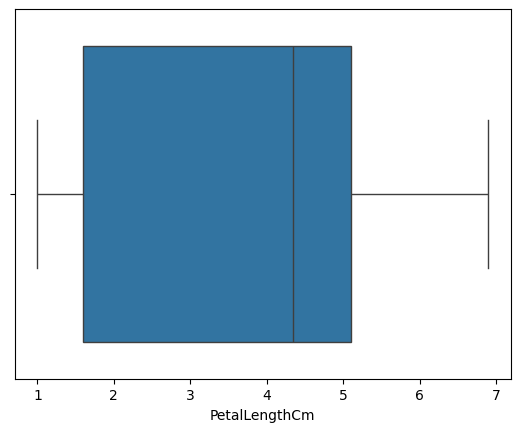

In [6]:
sns.boxplot(x = 'PetalLengthCm' , data = data)

<Axes: xlabel='PetalWidthCm'>

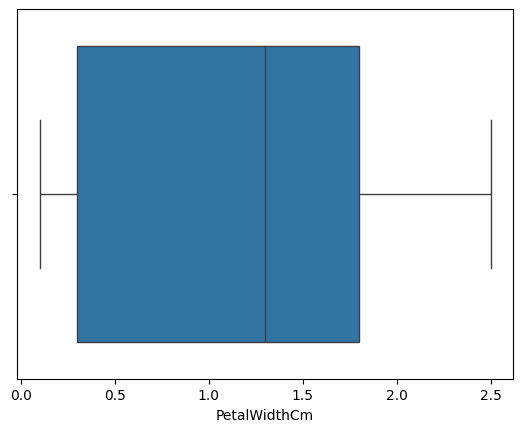

In [7]:
sns.boxplot(x = 'PetalWidthCm' , data = data)

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'SepalLengthCm'}>],
       [<Axes: title={'center': 'SepalWidthCm'}>,
        <Axes: title={'center': 'PetalLengthCm'}>],
       [<Axes: title={'center': 'PetalWidthCm'}>, <Axes: >]], dtype=object)

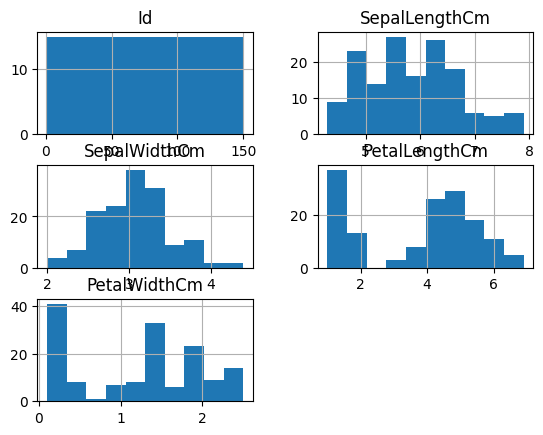

In [8]:
data.hist()

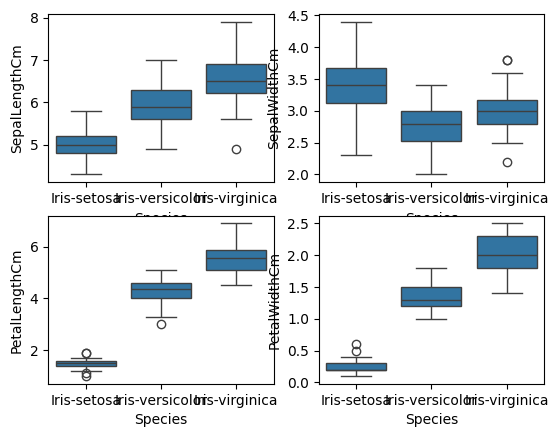

In [9]:
def graph(y):
    sns.boxplot(x = 'Species', y = y, data = data)
    
plt.subplot(221)
graph('SepalLengthCm')
    
plt.subplot(222)
graph('SepalWidthCm')
    
plt.subplot(223)
graph('PetalLengthCm')
    
plt.subplot(224)
graph('PetalWidthCm')
    
plt.show()

In [10]:
Q1 = np.percentile(data['SepalWidthCm'], 25, interpolation = 'midpoint') # specifies the method to be used for interpolation when calculating the percentile.
Q1

# Interpolation is used to estimate the value corresponding to a given percentile 
# when the exact percentile 
# value does not fall exactly on an observation in the dataset.

C:\Users\Smit Joshi\AppData\Local\Temp\ipykernel_1400\2107685360.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['SepalWidthCm'], 25, interpolation = 'midpoint') # specifies the method to be used for interpolation when calculating the percentile.


2.8

In [11]:
Q3 = np.percentile(data['SepalWidthCm'] , 75 , interpolation = 'midpoint')
Q3

C:\Users\Smit Joshi\AppData\Local\Temp\ipykernel_1400\534397398.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(data['SepalWidthCm'] , 75 , interpolation = 'midpoint')


3.3

In [12]:
IQR = Q3 - Q1
IQR

0.5

In [13]:
data.shape

(150, 6)

In [14]:
upper = np.where(data['SepalWidthCm'] >= (Q3 + 0.1 * IQR))
upper

(array([  0,   4,   5,   6,   7,  10,  11,  14,  15,  16,  17,  18,  19,
         20,  21,  22,  24,  26,  27,  28,  31,  32,  33,  36,  39,  40,
         43,  44,  46,  48,  85, 109, 117, 131, 136, 148], dtype=int64),)

In [15]:
lower = np.where(data['SepalWidthCm'] <= (Q1 + 0.1 * IQR))
lower

(array([ 41,  53,  54,  55,  57,  59,  60,  62,  67,  68,  69,  71,  72,
         73,  76,  79,  80,  81,  82,  83,  87,  89,  90,  92,  93,  94,
         98,  99, 101, 106, 108, 111, 113, 114, 118, 119, 121, 122, 123,
        126, 128, 130, 132, 133, 134, 142, 146], dtype=int64),)

In [16]:
data.drop(upper[0], inplace = True)

In [17]:
data.drop(lower[0], inplace = True)

In [18]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa
...,...,...,...,...,...,...
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica


In [19]:
data.shape

(67, 6)

<Axes: xlabel='SepalWidthCm'>

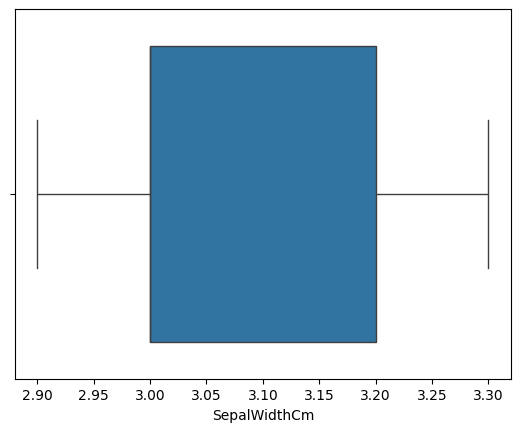

In [20]:
sns.boxplot(x = "SepalWidthCm", data = data)